# MMF Colab Demo

This notebook provides step-by-step instructions on how to use MMF to build new models and uses the Hateful Memes (HM) dataset for this specific tutorial.

Follow these links to learn more about MMF:
- [MMF Blog Post]()
- [GitHub repo](https://github.com/facebookresearch/mmf)
- [Website](https://mmf.sh) and [Documentation](https://mmf.rtfd.io)

In general, the notebook demonstrates how to:

1. [Download MMF](#scrollTo=l7Eo9ZqTDW3I)
2. [Download the HM dataset](#scrollTo=nYyXt9dzEBEU&line=12&uniqifier=1)
3. [Test pretrained models on HM](#scrollTo=nYyXt9dzEBEU&line=12&uniqifier=1)
4. [Submit a prediction](#scrollTo=uhKvYHtWHlyr&line=3&uniqifier=1)
5. [Train existing model on HM](#scrollTo=) 
6. [Build your model](#scrollTo=)
7. [Train your model on HM](#scrollTo=) 

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from mmf.utils.env import setup_imports
setup_imports()

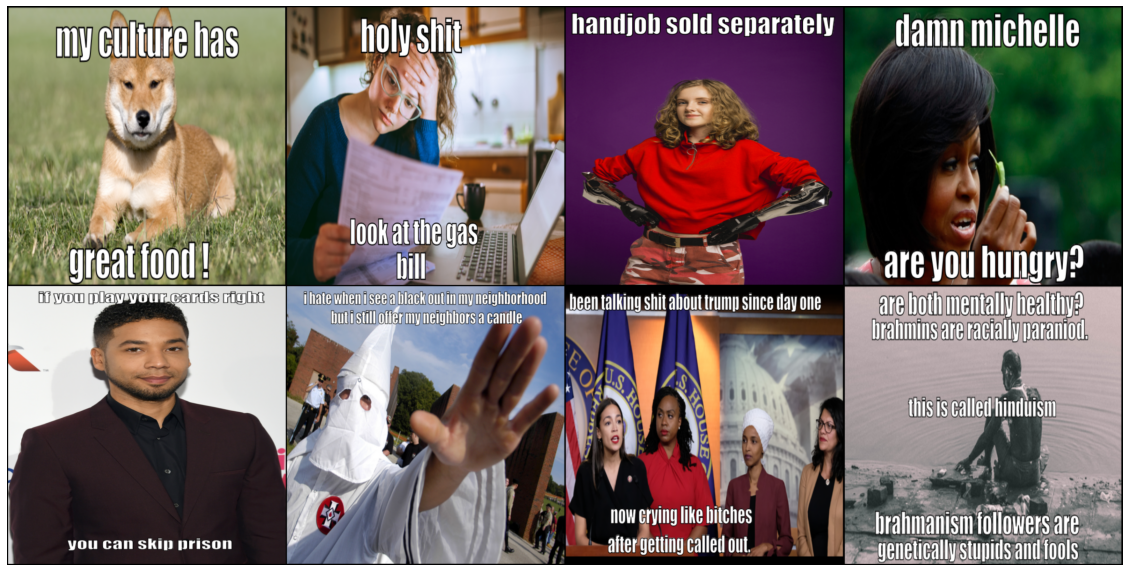

In [2]:
from mmf.common.registry import registry
from mmf.models.mmbt import MMBT
from mmf.utils.build import build_dataset

dataset = build_dataset("hateful_memes")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 20)
dataset.visualize(num_samples=8, size=(512, 512), nrow=4)

## mmf transformer

In [7]:
!mmf_run config="./configs/mmf_transformer_early_stop.yaml" \
  model=mmf_transformer \
  dataset=hateful_memes \
  run_type=train_val \
  training.log_interval=200 \
  training.max_updates=22000 \
  training.batch_size=64 \
  training.evaluation_interval=200 \
  training.tensorboard=True \
  training.checkpoint_interval=200 \
#   checkpoint.resume_pretrained=True \
#   checkpoint.resume_zoo=mmf_transformer.pretrained.okvqa \
  dataset_config.hateful_memes.annotations.train[0]="hateful_memes/defaults/annotations/train.jsonl" \
  dataset_config.hateful_memes.annotations.val[0]="hateful_memes/defaults/annotations/dev_unseen.jsonl" \
  dataset_config.hateful_memes.annotations.test[0]="hateful_memes/defaults/annotations/test_unseen.jsonl"

2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option config to ./configs/mmf_transformer_early_stop.yaml
2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option model to mmf_transformer
2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option run_type to train_val
2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option training.log_interval to 200
2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option training.max_updates to 22000
2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option training.batch_size to 64
2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option training.evaluation_interval to 200
2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option training.tensorboard to True
2021-05-02T11:58:46 | mmf.utils.configuration: Overriding option training.checkpoint_interval to 200
2021-05-02T11:58:46 | mmf: Logging to: 

2021-05-02T11:58:58 | mmf.utils.general: Total Parameters: 171174978. Trained Parameters: 171174978
2021-05-02T11:58:58 | mmf.trainers.core.training_loop: Starting training...
2021-05-02T12:01:17 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T12:01:17 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T12:01:17 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

WARNING 2021-05-02T12:01:17 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

2021-05-02T12:01:20 | mmf.utils.checkpoint: Saving current checkpoint
20

2021-05-02T12:06:39 | mmf.utils.checkpoint: Saving best checkpoint
2021-05-02T12:06:42 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T12:06:45 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T12:06:45 | mmf.trainers.callbacks.logistics: progress: 600/22000, val/hateful_memes/cross_entropy: 0.8373, val/total_loss: 0.8373, val/hateful_memes/accuracy: 0.6296, val/hateful_memes/binary_f1: 0.2857, val/hateful_memes/roc_auc: 0.6265, num_updates: 600, epoch: 5, iterations: 600, max_updates: 22000, val_time: 10s 946ms, best_update: 600, best_iteration: 600, best_val/hateful_memes/roc_auc: 0.626500
2021-05-02T12:09:05 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T12:09:05 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T12:09:05 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the op

2021-05-02T12:14:24 | mmf.trainers.core.evaluation_loop: Finished training. Loaded 9
2021-05-02T12:14:24 | mmf.trainers.core.evaluation_loop:  -- skipped 0 batches.
2021-05-02T12:14:24 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T12:14:24 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

WARNING 2021-05-02T12:14:24 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

2021-05-02T12:14:27 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T12:14:30 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T12:14:30 | mmf.tr

2021-05-02T12:22:03 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T12:22:06 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T12:22:06 | mmf.trainers.callbacks.logistics: progress: 1800/22000, train/hateful_memes/cross_entropy: 0.1095, train/hateful_memes/cross_entropy/avg: 0.1947, train/total_loss: 0.1095, train/total_loss/avg: 0.1947, max mem: 20455.0, experiment: run, epoch: 14, num_updates: 1800, iterations: 1800, max_updates: 22000, lr: 0.00001, ups: 1.38, time: 02m 25s 818ms, time_since_start: 23m 08s 162ms, eta: 04h 16m 30s 448ms
2021-05-02T12:22:06 | mmf.trainers.core.training_loop: Evaluation time. Running on full validation set...
2021-05-02T12:22:06 | mmf.common.test_reporter: Predicting for hateful_memes
2021-05-02T12:22:09 | mmf.trainers.core.evaluation_loop: Finished training. Loaded 9
2021-05-02T12:22:09 | mmf.trainers.core.evaluation_loop:  -- skipped 0 batches.
2021-05-02T12:22:09 | mmf.utils.checkpoint: Checkpoint save operation star

2021-05-02T12:29:46 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T12:29:46 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T12:29:46 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

WARNING 2021-05-02T12:29:46 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

2021-05-02T12:29:48 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T12:29:51 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T12:29:51 | mmf.trainers.callbacks.logistics: progress: 2400/22000, train/hateful_memes/

2021-05-02T12:35:06 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T12:35:09 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T12:35:09 | mmf.trainers.callbacks.logistics: progress: 2800/22000, val/hateful_memes/cross_entropy: 2.7556, val/total_loss: 2.7556, val/hateful_memes/accuracy: 0.6407, val/hateful_memes/binary_f1: 0.3660, val/hateful_memes/roc_auc: 0.6255, num_updates: 2800, epoch: 22, iterations: 2800, max_updates: 22000, val_time: 08s 478ms, best_update: 800, best_iteration: 800, best_val/hateful_memes/roc_auc: 0.637735
2021-05-02T12:37:29 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T12:37:29 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T12:37:29 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(S

2021-05-02T12:42:47 | mmf.trainers.core.evaluation_loop: Finished training. Loaded 9
2021-05-02T12:42:47 | mmf.trainers.core.evaluation_loop:  -- skipped 0 batches.
2021-05-02T12:42:47 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T12:42:47 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

WARNING 2021-05-02T12:42:47 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

2021-05-02T12:42:50 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T12:42:54 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T12:42:54 | mmf.tr

2021-05-02T12:50:28 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T12:50:31 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T12:50:31 | mmf.trainers.callbacks.logistics: progress: 4000/22000, train/hateful_memes/cross_entropy: 0.0149, train/hateful_memes/cross_entropy/avg: 0.0944, train/total_loss: 0.0149, train/total_loss/avg: 0.0944, max mem: 20455.0, experiment: run, epoch: 31, num_updates: 4000, iterations: 4000, max_updates: 22000, lr: 0.00001, ups: 1.37, time: 02m 26s 988ms, time_since_start: 51m 32s 969ms, eta: 03h 50m 24s 253ms
2021-05-02T12:50:31 | mmf.trainers.core.training_loop: Evaluation time. Running on full validation set...
2021-05-02T12:50:31 | mmf.common.test_reporter: Predicting for hateful_memes
2021-05-02T12:50:34 | mmf.trainers.core.evaluation_loop: Finished training. Loaded 9
2021-05-02T12:50:34 | mmf.trainers.core.evaluation_loop:  -- skipped 0 batches.
2021-05-02T12:50:34 | mmf.utils.checkpoint: Checkpoint save operation star

2021-05-02T12:58:10 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T12:58:10 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T12:58:10 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

WARNING 2021-05-02T12:58:10 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

2021-05-02T12:58:12 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T12:58:15 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T12:58:15 | mmf.trainers.callbacks.logistics: progress: 4600/22000, train/hateful_memes/

2021-05-02T13:03:31 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T13:03:34 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T13:03:34 | mmf.trainers.callbacks.logistics: progress: 5000/22000, val/hateful_memes/cross_entropy: 2.8274, val/total_loss: 2.8274, val/hateful_memes/accuracy: 0.6389, val/hateful_memes/binary_f1: 0.3390, val/hateful_memes/roc_auc: 0.6045, num_updates: 5000, epoch: 38, iterations: 5000, max_updates: 22000, val_time: 08s 877ms, best_update: 800, best_iteration: 800, best_val/hateful_memes/roc_auc: 0.637735
2021-05-02T13:05:54 | mmf.trainers.callbacks.checkpoint: Checkpoint time. Saving a checkpoint.
2021-05-02T13:05:54 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T13:05:54 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(S

2021-05-02T13:11:10 | mmf.trainers.core.evaluation_loop: Finished training. Loaded 9
2021-05-02T13:11:10 | mmf.trainers.core.evaluation_loop:  -- skipped 0 batches.
2021-05-02T13:11:10 | mmf.utils.checkpoint: Checkpoint save operation started!
WARNING 2021-05-02T13:11:10 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

WARNING 2021-05-02T13:11:10 | py.warnings: /home/sandlot/Py38Torch170cu110/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)

2021-05-02T13:11:13 | mmf.utils.checkpoint: Saving current checkpoint
2021-05-02T13:11:15 | mmf.utils.checkpoint: Checkpoint save operation finished!
2021-05-02T13:11:15 | mmf.tr

2021-05-02T13:16:21 | mmf.utils.checkpoint: Checkpoint loaded.
2021-05-02T13:16:21 | mmf.utils.checkpoint: Current num updates: 800
2021-05-02T13:16:21 | mmf.utils.checkpoint: Current iteration: 800
2021-05-02T13:16:21 | mmf.utils.checkpoint: Current epoch: 7
2021-05-02T13:16:22 | mmf.trainers.mmf_trainer: Starting inference on val set
2021-05-02T13:16:22 | mmf.common.test_reporter: Predicting for hateful_memes
100%|█████████████████████████████████████████████| 9/9 [00:02<00:00,  3.39it/s]
2021-05-02T13:16:25 | mmf.trainers.core.evaluation_loop: Finished training. Loaded 9
2021-05-02T13:16:25 | mmf.trainers.core.evaluation_loop:  -- skipped 0 batches.
2021-05-02T13:16:25 | mmf.trainers.callbacks.logistics: progress: 800/22000, val/hateful_memes/cross_entropy: 0.8488, val/total_loss: 0.8488, val/hateful_memes/accuracy: 0.6389, val/hateful_memes/binary_f1: 0.4214, val/hateful_memes/roc_auc: 0.6377
2021-05-02T13:16:25 | mmf.trainers.callbacks.logistics: Finished run in 01h 17m 26s 702ms
